In [2]:
import numpy as np
import matplotlib.pyplot as plt

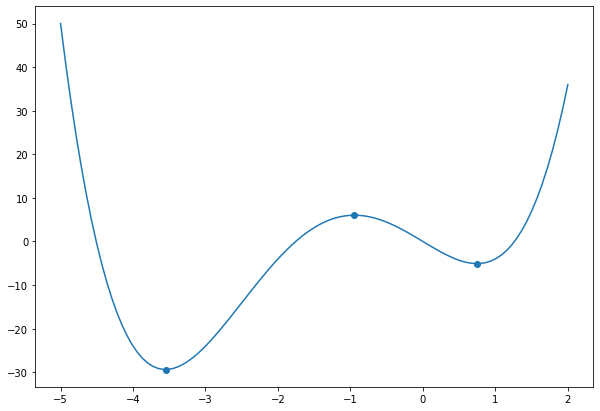

In [ ]:
def F(x):
  return x**4 + 5*x**3 - 10*x

x = np.linspace(-5, 2, 100)
y = list(map(F, x))

plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.xlabel = 'X'
plt.ylabel = 'Y'
plt.scatter([-3.5518, -0.9439, 0.7457], [F(-3.5518), F(-0.9439), F(0.7457)], lw=1)
plt.show()

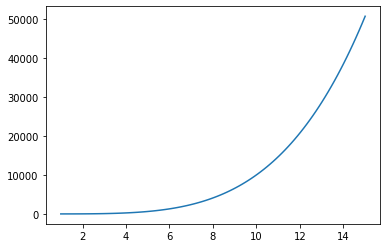

In [ ]:
def Fx(x):
  return x**4

x = np.linspace(1, 15, 100)
y = list(map(Fx, x))

plt.plot(x, y)
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.show()

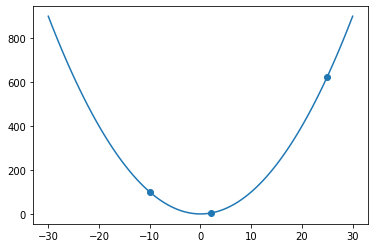

In [ ]:
def F3(x):
  return x**2

x = np.linspace(-30, 30, 100)
y = list(map(F3, x))

plt.plot(x, y)
plt.scatter([-10, 2, 25], [F3(-10), F3(2), F3(25)], lw = 1)

In [ ]:
def numerical_derivate_1d(func, epsilon):
  def deriv_func(x):
    return (func(x+epsilon)-func(x))/epsilon
  return deriv_func

def polynom_to_prime(x):
  return 20 * x**5 + x**3 - 5 * x**2 + 2 * x + 2.0

def primed_poly(x):
  return 100 * x**4 + 3 * x**2 -10 * x + 2.0

approx_deriv = numerical_derivate_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
  estimation_error = abs(primed_poly(x) - approx_deriv(x))
  if(estimation_error > tol):
    debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
    right_flag = False

if not right_flag:
  print("Something gone wrong")
  print(debug_print)
  plt.plot(grid, primed_poly(grid), label = '')
  plt.plot(grid, approx_deriv(grid), label = '')
  plt.legend()

print(str(right_flag))

True


Найти минимум с помощью градиентного спуска

In [ ]:
def grad_descent_v1(func, deriv, start=None, callback=None, low = None, high = None):


  if start is None:


    np.random.seed(179)
    start = np.random.randn()

  estimate = start
  callback(estimate, func(estimate))

  N = 100
  lmd = 0.1

  for i in range (N):
    start -= lmd*deriv(start)

  return start

#Отрисовка:
#####
#####
#####

def plot_convergence_1d(func, x_steps, y_steps, ax, grid=None, title=""):
  ax.set_title(title, fontsize=16, fontweight='bold')
  #param func: функция, которая минимизируется градиентным спуском
  #param x_steps: np.array(float) — шаги алгоритма по оси Ox
  #param y_steps: np.array(float) — шаги алгоритма по оси Оу
  #param ax: холст для отрисовки графика
  #param grid: np.array(float) — точки отрисовки функции func
  #param title: str — заголовок графика

  if grid is None:
    grid = np.linspace(np.min(x_steps), np.max(x_steps), 100)

  fgrid = [func(item) for item in grid]
  ax.plot(grid, fgrid)
  yrange = np.max(fgrid) - np.min(fgrid)

  arrow_kwargs = dict(linestyle='--', color='grey', alpha=0.4)
  for i, _ in enumerate(x_steps):
        if i + 1 < len(x_steps):
            ax.arrow(
                x_steps[i], y_steps[i], 
                x_steps[i + 1] - x_steps[i],
                y_steps[i + 1] - y_steps[i], 
                **arrow_kwargs
            )

    n = len(x_steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(x_steps, y_steps, c=color_list)
    ax.scatter(x_steps[-1], y_steps[-1], c="red")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")


class LoggingCallback:
    """
    Класс для логирования шагов градиентного спуска. 
    Сохраняет точку (x, f(x)) на каждом шаге.
    Пример использования в коде: callback(x, f(x))
    """
    def __init__(self):
        self.x_steps = []
        self.y_steps = []

    def __call__(self, x, y):
        self.x_steps.append(x)
        self.y_steps.append(y)


def test_convergence_1d(grad_descent, test_cases, tol=1e-2, axes=None, grid=None):
    """
    Функция для проверки корректности вашего решения в одномерном случае.
    Она же используется в тестах на Stepik, так что не меняйте её код!
    :param grad_descent: ваша реализация градиентного спуска
    :param test_cases: dict(dict), тесты в формате dict с такими ключами:
        - "func" — функция (обязательно)
        - "deriv" — её производная (обязательно)
        - "start" — начальная точка start (м.б. None) (опционально) 
        - "low", "high" — диапазон для выбора начальной точки (опционально)
        - "answer" — ответ (обязательно)
    При желании вы можете придумать и свои тесты.
    :param tol: предельное допустимое отклонение найденного ответа от истинного
    :param axes: матрица холстов для отрисовки, по ячейке на тест
    :param grid: np.array(float), точки на оси Ох для отрисовки тестов
    :return: флаг, корректно ли пройдены тесты, и дебажный вывод в случае неудачи
    """
    right_flag = True
    debug_log = []
    for i, key in enumerate(test_cases.keys()):
        # Формируем входные данные и ответ для алгоритма.
        answer = test_cases[key]["answer"]
        test_input = deepcopy(test_cases[key])
        del test_input["answer"]
        # Запускаем сам алгоритм.
        callback = LoggingCallback()  # Не забываем про логирование
        res_point = grad_descent(**test_input, callback=callback)
        # Отрисовываем результаты.
        if axes is not None:
            ax = axes[np.unravel_index(i, shape=axes.shape)]
            x_steps = np.array(callback.x_steps)
            y_steps = np.array(callback.y_steps)
            plot_convergence_1d(
                test_input["func"], x_steps, y_steps, 
                ax, grid, key
            )
            ax.axvline(answer, 0, linestyle="--", c="red",
                        label=f"true answer = {answer}")
            ax.axvline(x_steps[-1], 0, linestyle="--", c="xkcd:tangerine", 
                        label=f"estimate = {np.round(x_steps[-1], 3)}")
            ax.legend(fontsize=16)
        # Проверяем, что найдення точка достаточно близко к истинной
        if abs(answer - res_point) > tol or np.isnan(res_point):
            debug_log.append(
                f"Тест '{key}':\n"
                f"\t- ответ: {answer}\n"
                f"\t- вывод алгоритма: {res_point}"
            )
            right_flag = False
    return right_flag, debug_log

test_cases = {
    "square": {
        "func" : lambda x: x * x, 
        "deriv" : lambda x: 2 * x, 
        "start" : 2, 
        "answer" : 0.0
    },
    "module": {
        "func" : lambda x: abs(x),  
        "deriv" : lambda x: 1 if x > 0 else -1,
        "start" : 2, 
        "answer" : 0.0
    },
    "third_power": {
        "func" : lambda x: abs((x - 1)**3),
        "deriv" : lambda x: 3 * (x - 1)**2 * np.sign(x-1),
        "start" : -1, 
        "answer" : 1.0
    },
    "ln_x2_1": {
        "func" : lambda x: np.log((x + 1)**2 + 1),  
        "deriv" : lambda x: 2 * (x + 1) / (x**2 +1), 
        "start" : 1, 
        "answer" : -1.0
    }
}



tol = 1e-2  # желаемая точность 
fig, axes = plt.subplots(2,2, figsize=(14, 12))
fig.suptitle("Градиентный спуск, версия 1", fontweight="bold", fontsize=20)
grid = np.linspace(-2, 2, 100)

is_correct, debug_log = test_convergence_1d(
    grad_descent_v1, test_cases, tol, 
    axes, grid
)
if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)

-2.094582726355172


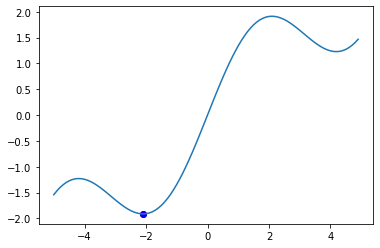

In [ ]:
import time

def f(x):
  return np.sin(x)+0.5*x

def df(x):
  return np.cos(x)+0.5

N = 20
xx = 0
lmd = 0.2

x_plt = np.arange(-5.0, 5.0, 0.1)
f_plt = list(map(f, x_plt))

plt.ion()
fig, ax = plt.subplots()
ax.grid = True
ax.plot(x_plt, f_plt)
point = ax.scatter(xx, f(xx), c='red')

mn = 100
for i in range(N):
  lmd = 1/min(i+1, mn)
  xx = xx - lmd * np.sign(df(xx))
  point.set_offsets([xx, f(xx)])
  fig.canvas.draw()
  fig.canvas.flush_events()
  time.sleep(0.02)

plt.ioff()
print(xx)
ax.scatter(xx, f(xx), c = 'blue')
plt.show()

In [ ]:
def grad_descent_v2(func, deriv, low=None, high=None, callback=None):
    eps = 0.001
    estimate = high
    for i in np.arange(low, high, (high - low) / 1000):
        if func(i) < func(estimate):
            estimate = i - eps * deriv(i)
        callback(estimate, func(estimate))
    return estimate

-2.9491100151085012


In [4]:
import plotly.graph_objects as go
import numpy as np

def func(x, y):
    return -1 / ((x - 1)**2 + (y - 1.5)**2 + 1) * np.cos(2 * (x - 1)**2 + 2 * (y - 1.5)**2)

X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.05)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = func(X, Y)

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(width=1000, height=1000)
fig.show()

In [6]:
def numerical_derivative_2d(func, epsilon):
  def grad_func(x):
    grad_x = ((func((x[0]+epsilon,x[1]))-func(x))/epsilon)
    grad_y = ((func((x[0],x[1]+epsilon))-func(x))/epsilon)
    return ((grad_x, grad_y))
  return grad_func


def grad_descent_2d(func, low, high, callback=None):
    eps = 0.001
    ex = high
    ey = high
    #deriv
    for i in np.arange(low, high, (high - low) / 1000):
      for j in np.arange(low, high, (high - low) / 1000):
        if func(i, j) < func(ex, ey):
            estimate = i - eps * numerical_derivate_2d(i, j)
        callback((i, j), func(i, j))
    return ((i, j))

Для двумерной функции:

In [ ]:
def numerical_derivative_2d(func, epsilon):
    def grad_func(x):
        return (((func((x[0]+epsilon,x[1]))-func(x))/epsilon),((func((x[0],x[1]+epsilon))-func(x))/epsilon))
    return grad_func

def grad_descent_2d(func, low, high, callback=None):
    lr = 0.5
    epsilon = 1e-10
    deriv = numerical_derivative_2d(func,epsilon)
    listEstimation = []
    count = [np.array([float(i), float(i)]) for i in range (low, high)]
    for estimate in count:
            oldEstimate = np.array([0,0])
            for _ in range(100000):
                callback(estimate,func(estimate))
                if (estimate-oldEstimate < epsilon).all():
                    listEstimation.append(estimate)
                    break
                oldEstimate = estimate
                estimate = estimate - lr*np.asarray(deriv(estimate))
    best_estimate = min(listEstimation,key = func)
    return best_estimate